Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Support Vector Machine
Accuracy Score: 86.24000000000001%
Confusion Matrix: 
[[4307  700]
 [ 676 4317]]
classification_report               precision    recall  f1-score   support

           0       0.86      0.86      0.86      5007
           1       0.86      0.86      0.86      4993

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



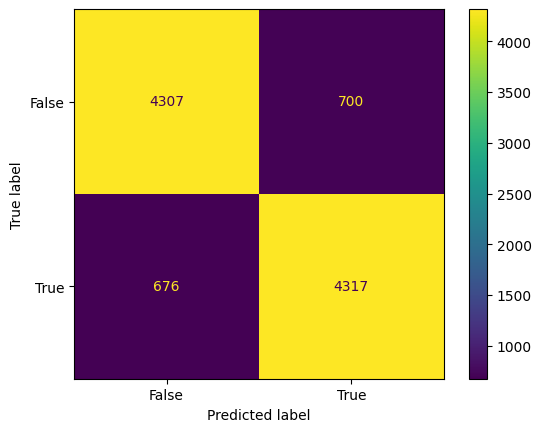

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv(r"/content/drive/My Drive/movie_data.csv")
data.head(25)
X = data["review"]
y = data["sentiment"]
#Using CountVectorizer to convert text into tokens/features
vect = CountVectorizer(stop_words='english', ngram_range = (1,1), max_df = .80, min_df = 4)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size= 0.2)
#Using training data to transform text into counts of features for each message
vect.fit(X_train)
X_train_dtm = vect.transform(X_train) 
X_test_dtm = vect.transform(X_test)


#Accuracy using SVM Model
SVM = LinearSVC()
SVM.fit(X_train_dtm, y_train)
y_pred = SVM.predict(X_test_dtm)
print('\nSupport Vector Machine')
print('Accuracy Score: ',metrics.accuracy_score(y_test,np.round(abs(y_pred)), normalize=False)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')
print('classification_report',metrics.classification_report(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()